### Setup CoLab environment

In [1]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [2]:
# Import libraries necessary for this project
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from pathlib import Path
#import seaborn as sns
# from time import time
# %matplotlib inline
# pd.set_option('display.max.columns', None)
# pd.set_option('display.max.rows', None)
# pd.set_option('display.precision',2)
# # pd.reset_option('display.max.columns')
# pd.reset_option('display.max.rows')

### Load File

In [4]:
# https://bitly.com/gradescsv
# Load 學測分數 dataset
target_csv_path = Path.cwd() / 'drive' / 'MyDrive' / 'Pandas' / '學測資料' / 'grades.csv'
grade_df = pd.read_csv(target_csv_path)

In [5]:
grade_df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### Understand **data**

In [8]:
grade_df.head(10)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
6,梁俊翔,11,13,10,10,14
7,林金鳳,8,9,10,10,8
8,許協旺,9,9,12,10,10
9,郭雅惠,10,15,12,11,9


In [9]:
grade_df.shape

(100, 6)

####國文分數的分析

In [10]:
grade_df['國文'] #取出的 data type 為 Series

,國文
0,9
1,10
2,13
3,10
4,13
...,...
95,9
96,8
97,14
98,15


In [11]:
grade_df.國文 # 短的寫法 取出的 data type 為 Series

,國文
0,9
1,10
2,13
3,10
4,13
...,...
95,9
96,8
97,14
98,15


In [ ]:
cg = grade_df.國文.values #取出的 data type 為 Numpy Array 便於做數學計算
cg

array([ 9, 10, 13, 10, 13, 13, 11,  8,  9, 10, 14, 13, 11, 15,  8, 11, 14,
       12,  9, 14, 13,  9, 12, 10, 10, 13, 13,  8, 15, 14,  8, 15,  9, 14,
       13, 14, 12, 11,  8,  9, 12, 14, 14, 12, 13,  9, 14,  8, 15, 10, 12,
       14, 12, 14, 15,  9, 11, 12, 10, 11, 14, 14,  8, 12,  9, 13, 10, 14,
        8, 12,  9,  9, 10, 13, 14, 13,  9, 13, 12,  9, 13, 11, 11, 10, 10,
       10, 11, 10, 11, 13,  8, 14,  8, 11, 10,  9,  8, 14, 15,  9])

In [12]:
# 國文成績統計
chinese_grade = grade_df['國文'].values # data type is Numpy ndarray
print('Mean: ', chinese_grade.mean())
print('STD: ', chinese_grade.std())

Mean:  11.39
STD:  2.1858407993264284


<Axes: >

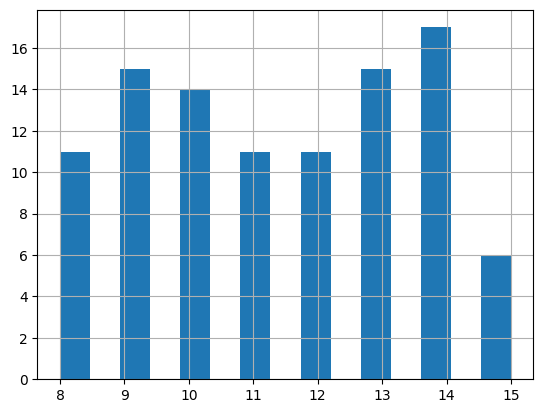

In [ ]:
# 國文成績直方圖
grade_df['國文'].hist(bins =15)

#### 統計敘述


In [13]:
# 統計敘述
grade_df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


In [14]:
# 學科間的相關性
# R值相關程度之高低，在正負0.3之間（即0.3至-0.3之間）稱為低度相關；
# 在正負0.3-0.6之間（即指介於0.3至0.6，-0.3至-0.6之間）稱為中度相關；
# 而在正負0.6至0.9之間（即指在0.6至0.9，-0.6至-0.9之間）則稱為高度相關；
# 若是R值為正負1，即表示完全相關。
grade_df[['國文', '英文', '數學', '自然', '社會']].corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


In [15]:
# 國文和數學級分的相關性
grade_df['國文'].corr(grade_df['數學'])

-0.3108989822179331

#### 總級分分析

In [16]:
# 計算欄位值的和
grade_df['總級分'] = grade_df[['國文', '英文', '數學', '自然', '社會']].sum(axis=1)
#grade_df['總級分'] = grade_df.loc[:,'國文':'社會'].sum(axis=1)
grade_df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


In [17]:
# 排序
grade_df.sort_values(by='總級分', ascending = False)

,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,66
12,李正偉,11,15,11,14,15,66
54,陳怡潔,15,15,9,15,11,65
25,蔡亦瑄,13,13,14,13,12,65
57,胡淳茜,12,15,14,13,11,65
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47
32,林建亨,9,11,8,8,11,47
1,胡玉華,10,10,10,8,9,47
7,林金鳳,8,9,10,10,8,45


In [18]:
grade_df['主科加權'] = grade_df['數學'] * 1.5 + grade_df['英文']
grade_df.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,主科加權
0,劉俊安,9,10,15,10,13,57,32.5
1,胡玉華,10,10,10,8,9,47,25.0
2,黃淑婷,13,15,8,11,14,61,27.0
3,陳上紫,10,10,8,9,14,51,22.0
4,崔靜成,13,12,14,12,13,64,33.0
5,張雅岳,13,12,12,12,8,57,30.0
6,梁俊翔,11,13,10,10,14,58,28.0
7,林金鳳,8,9,10,10,8,45,24.0
8,許協旺,9,9,12,10,10,50,27.0
9,郭雅惠,10,15,12,11,9,57,33.0


In [19]:
grade_df.sort_values(by = ['主科加權', '總級分'], ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,主科加權
73,吳志遠,13,15,15,8,8,59,37.5
83,李士賢,10,14,15,13,13,65,36.5
57,胡淳茜,12,15,14,13,11,65,36.0
36,詹威德,12,13,15,10,14,64,35.5
70,葉儀依,9,13,15,8,14,59,35.5
68,劉麗芬,8,14,14,14,14,64,35.0
66,邱盈俊,10,14,14,13,8,59,35.0
37,曾怡君,11,12,15,13,14,65,34.5
24,陳竹伯,10,12,15,10,14,61,34.5
76,周育霖,9,12,15,13,12,61,34.5
